<a href="https://colab.research.google.com/github/negarhonarvar/SAT-optimized-solver/blob/main/SimulatedAnnealing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!pip install python-sat
!pip install numpy
import pysat as py
from pysat.formula import CNF
from pysat.solvers import Solver
from google.colab import output
import random
import math
import numpy as np
import matplotlib.pyplot as plt
#import Utilities as ut

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
# opening and reading the cnf files

T = 100
T_Coefficient = .99
number_of_trues = 0
number_of_temp_trues = 0

def read_cnf_file(list_create):
   formula = []

   for i in range(4, len(list_create)):
    temp_list = list_create[i].split(' ')
    junk_list = []
    if len(formula) == 429:
      break
    for k in range(5):
      if(k % 2 == 0):
         num_int = temp_list[k]
         if int(num_int) < 0:
            junk_list.append( (abs(int(num_int)), 0) )
         elif int(num_int) > 0:
            junk_list.append( (int(num_int), 1) )
    formula.append(junk_list)

   return formula

In [23]:
def number_of_true(list_trues):
   number_of_trues = 0
   for i in range(len(list_trues)):
      is_true = list_trues[i][0][1] + list_trues[i][1][1] + list_trues[i][2][1]
      if is_true >= 1 :
        number_of_trues += 1
   return number_of_trues

In [24]:
def create_noise(new_list):
  new_list = []
  loc  = random.randrange(0, 429)
  bit  = random.randrange(0, 3)

  new_list = sample.copy()

  demo_list = list(new_list[loc][bit])
  temp = demo_list[1]
  if temp == 1:
    demo_list[1] = 0
  else:
    demo_list[1] = 1
  new_list[loc][bit] = tuple(demo_list)
  return new_list

In [25]:
def check_second_chance(f, f_temp):
  rand = random.uniform(0, 1)
  global T

  delta_f = abs(f - f_temp)
  result = math.exp(-delta_f / T)
  return  rand < result

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


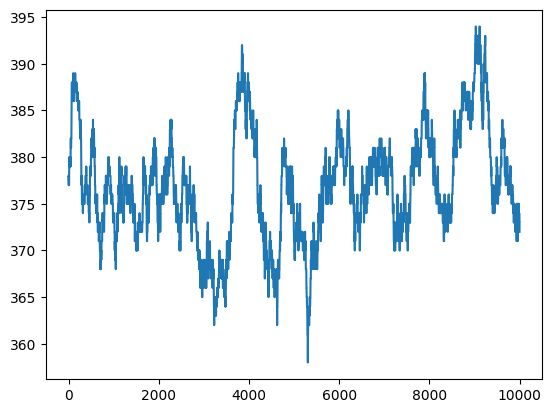

In [33]:
# main part
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/Colab Notebooks/Input.cnf'
df = CNF(from_file=path)
lists= df.clauses
read_f = open(path, 'r').read()
first_list = read_f.split("\n")
sample = read_cnf_file(first_list)

number_of_trues = number_of_true(sample)
itr_list = []
point_list = []
# point_list.append(number_of_trues)
i = 1

while(i != 10000):
  itr_list.append(i)
  i += 1
  new_list = sample
  new_list = create_noise(new_list)
  number_of_temp_trues = number_of_true(new_list)
  if number_of_temp_trues > number_of_trues:
    sample = new_list
    new_list = []
    number_of_trues = number_of_temp_trues
  else:
    if check_second_chance(number_of_trues, number_of_temp_trues):
      sample = new_list
      new_list = []
      number_of_trues = number_of_temp_trues
    else:
      new_list = []
  point_list.append(number_of_trues)

plt.plot(itr_list, point_list)
plt.show()